#Importar as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importar o dataset

In [ ]:
#provavelmente você terá que modificar no seu computador
df = pd.read_csv('/content/drive/MyDrive/ELT579/Problema3/produtividade_filtrado.csv')

df.head()

,ID,ARVI_mean_,ARVI_mean_0,ARVI_mean_0.2,ARVI_mean_0.4,ARVI_mean_0.6,ARVI_std_,ARVI_std_0,ARVI_std_0.2,ARVI_std_0.4,...,rededge_mean_0,rededge_mean_0.2,rededge_mean_0.4,rededge_mean_0.6,rededge_std_,rededge_std_0,rededge_std_0.2,rededge_std_0.4,rededge_std_0.6,produtividade
0,1,0.826175,0.826175,0.826175,0.830084,0.891440,0.204087,0.204087,0.204087,0.198302,...,0.102632,0.102632,0.102359,0.101120,0.014673,0.014673,0.014673,0.014254,0.013392,471.7
1,2,0.929867,0.929867,0.929867,0.929867,0.930354,0.044495,0.044495,0.044495,0.044495,...,0.107168,0.107168,0.107168,0.107170,0.014065,0.014065,0.014065,0.014065,0.014072,677.0
2,3,0.935018,0.935018,0.935018,0.935018,0.935018,0.038189,0.038189,0.038189,0.038189,...,0.102992,0.102992,0.102992,0.102992,0.011667,0.011667,0.011667,0.011667,0.011667,NaN
3,4,0.924935,0.924935,0.924935,0.924935,0.925422,0.053082,0.053082,0.053082,0.053082,...,0.100519,0.100519,0.100519,0.100532,0.015275,0.015275,0.015275,0.015275,0.015277,905.6
4,5,0.924226,0.924226,0.924226,0.924226,0.924226,0.057756,0.057756,0.057756,0.057756,...,0.101913,0.101913,0.101913,0.101913,0.013607,0.013607,0.013607,0.013607,0.013607,670.1


#preprocessamento e visualização dos dados

##dados faltantes

In [ ]:
for i in df.columns:
  if df[i].isna().sum() != 0:
    print(i, df[i].isna().sum())


produtividade 18


In [ ]:
df = df.fillna(0)

In [ ]:
#X = df.loc[:,['ARVI_mean_',	'NDVI_mean_']]
X = df.drop(['ID', 'produtividade'], axis = 1)
y = df.loc[:,['produtividade']]


In [ ]:
X.head()

,ARVI_mean_,ARVI_mean_0,ARVI_mean_0.2,ARVI_mean_0.4,ARVI_mean_0.6,ARVI_std_,ARVI_std_0,ARVI_std_0.2,ARVI_std_0.4,ARVI_std_0.6,...,rededge_mean_,rededge_mean_0,rededge_mean_0.2,rededge_mean_0.4,rededge_mean_0.6,rededge_std_,rededge_std_0,rededge_std_0.2,rededge_std_0.4,rededge_std_0.6
0,0.826175,0.826175,0.826175,0.830084,0.891440,0.204087,0.204087,0.204087,0.198302,0.101132,...,0.102632,0.102632,0.102632,0.102359,0.101120,0.014673,0.014673,0.014673,0.014254,0.013392
1,0.929867,0.929867,0.929867,0.929867,0.930354,0.044495,0.044495,0.044495,0.044495,0.041743,...,0.107168,0.107168,0.107168,0.107168,0.107170,0.014065,0.014065,0.014065,0.014065,0.014072
2,0.935018,0.935018,0.935018,0.935018,0.935018,0.038189,0.038189,0.038189,0.038189,0.038189,...,0.102992,0.102992,0.102992,0.102992,0.102992,0.011667,0.011667,0.011667,0.011667,0.011667
3,0.924935,0.924935,0.924935,0.924935,0.925422,0.053082,0.053082,0.053082,0.053082,0.050801,...,0.100519,0.100519,0.100519,0.100519,0.100532,0.015275,0.015275,0.015275,0.015275,0.015277
4,0.924226,0.924226,0.924226,0.924226,0.924226,0.057756,0.057756,0.057756,0.057756,0.057756,...,0.101913,0.101913,0.101913,0.101913,0.101913,0.013607,0.013607,0.013607,0.013607,0.013607


In [ ]:
X.shape

(297, 350)

In [ ]:
y.head()

,produtividade
0,471.7
1,677.0
2,0.0
3,905.6
4,670.1


##dividir o banco de dados em treinamento e teste

In [ ]:
# dividir o banco de dados em treinamento e teste.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


##Padronizar o conjunto de dados em média 0 e desvio padrão 1

In [ ]:
#padronizar o conjunto de dados
from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler()           #cria um objeto
scaleX = scaleX.fit(X_train)        #ajusta aos dados
X_train_sc = scaleX.transform(X_train) #transforma os dados
X_test_sc = scaleX.transform(X_test)   #utransforma os dados

X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

##Redução da dimensionalidade com PCA


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [ ]:
var = pca.explained_variance_ratio_
var

array([0.62127874, 0.1818185 , 0.07486958, 0.03333585])

#Outra forma de fazer redução da dimensionalidade

In [ ]:
#from sklearn.decomposition import KernelPCA

#rbf_pca = KernelPCA(n_components = 3, kernel = 'rbf', gamma = 0.01)

#X_train_pca = rbf_pca.fit_transform(X_train_sc)
#X_test_pca = rbf_pca.transform(X_test_sc)

#OBS: existem ainda, outras formas de fazer essa redução

In [ ]:
X_train_pca

#Contruir o modelo de rede neural artificial totalmente conectada

In [ ]:
# Contruir o modelo de rede neural artificial totalmente conectada
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()

ann.add(Dense(units = 4, input_dim = 2, activation='relu'))
ann.add(Dense(units = 3, activation='relu'))
ann.add(Dense(units = 1))


#Compilar a rede neural

In [ ]:
#compilar a rede neural

ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])


In [ ]:
#visualizar a rede neural criada
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


#treinar a rede neural

In [ ]:
#treinar a rede neural

history = ann.fit(X_train_pca, y_train, batch_size= 10, validation_split=0.1, epochs = 250)



#Plotar gráficos

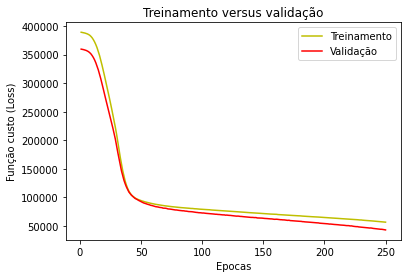

In [ ]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Função custo (Loss)")
plt.legend()
plt.show()



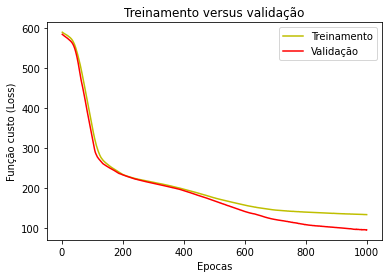

In [ ]:
acc = history.history['mae']

val_acc = history.history['val_mae']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, acc, 'y', label = "Treinamento")
plt.plot(epochs, val_acc, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Função custo (Loss)")
plt.legend()
plt.show()


#Predição nos dados de teste

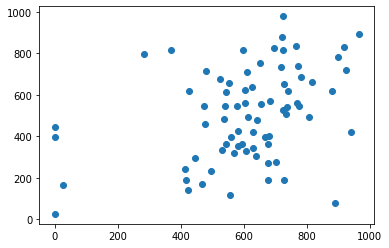

In [ ]:
#predição dos dados de teste
y_pred = ann.predict(X_test_pca)

plt.scatter(y_test, y_pred)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear = LinearRegression()
linear.fit(y_test, y_pred)

r2 = linear.score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 = ', round(r2, 2))
print("MAE = ", round(mae, 2))
print("MSE = ", round(mse, 2))

R2 =  0.26
MAE =  135.29
MSE =  31939.46


#Traçar a curva de regressão nos dados preditos versus observados

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


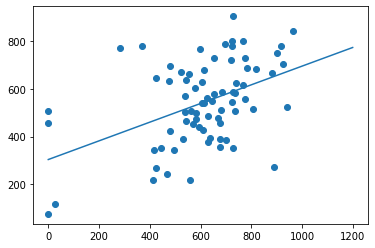

In [ ]:
#predição dos dados de teste
y_pred = ann.predict(X_test_pca)

y = np.arange(0, 1200)
y = np.expand_dims(y, axis=1)

yp = linear.predict(y)

plt.scatter(y_test, y_pred)
plt.plot(y, yp)
plt.show()